In [1]:
import numpy as np
import math
import copy
import random
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


In [2]:
data_23 =  pd.read_csv("/content/NBA_2023.csv")
data_24 = pd.read_csv("/content/NBA_2024.csv")
data_24.head()

,RANK,NAME,TEAM,POS,AGE,GP,MPG,USG%,TO%,FTA,...,APG,SPG,BPG,TPG,P+R,P+A,P+R+A,VI,ORtg,DRtg
0,NaN,Joel Embiid,Phi,C,30.1,39,33.6,39.6,15.0,452,...,5.6,1.2,1.7,3.8,45.7,40.3,51.3,15.3,124.0,104.8
1,NaN,Luka Doncic,Dal,G,25.1,70,37.5,36.0,14.6,608,...,9.8,1.4,0.5,4.0,43.1,43.7,52.9,15.5,121.9,109.9
2,NaN,Giannis Antetokounmpo,Mil,F,29.4,73,35.2,33.0,15.4,782,...,6.5,1.2,1.1,3.4,42.0,37.0,48.5,14.9,125.6,106.9
3,NaN,Shai Gilgeous-Alexander,Okc,G,25.8,75,34.0,32.9,9.8,649,...,6.2,2.0,0.9,2.2,35.6,36.3,41.8,11.9,128.6,107.7
4,NaN,Jalen Brunson,Nyk,G,27.6,77,35.4,32.5,10.1,497,...,6.7,0.9,0.2,2.4,32.3,35.5,39.1,10.0,124.2,112.6


In [3]:
data_23.drop(columns=["NAME","POS","TEAM","RANK","DRtg"], inplace=True)
data_24.drop(columns=["NAME","POS","TEAM","RANK","DRtg"], inplace=True)
data_24.head()

,AGE,GP,MPG,USG%,TO%,FTA,FT%,2PA,2P%,3PA,...,RPG,APG,SPG,BPG,TPG,P+R,P+A,P+R+A,VI,ORtg
0,30.1,39,33.6,39.6,15.0,452,0.883,712,0.556,139,...,11.0,5.6,1.2,1.7,3.8,45.7,40.3,51.3,15.3,124.0
1,25.1,70,37.5,36.0,14.6,608,0.786,908,0.573,744,...,9.2,9.8,1.4,0.5,4.0,43.1,43.7,52.9,15.5,121.9
2,29.4,73,35.2,33.0,15.4,782,0.657,1246,0.644,124,...,11.5,6.5,1.2,1.1,3.4,42.0,37.0,48.5,14.9,125.6
3,25.8,75,34.0,32.9,9.8,649,0.874,1218,0.576,269,...,5.5,6.2,2.0,0.9,2.2,35.6,36.3,41.8,11.9,128.6
4,27.6,77,35.4,32.5,10.1,497,0.847,1122,0.516,526,...,3.6,6.7,0.9,0.2,2.4,32.3,35.5,39.1,10.0,124.2


In [4]:
cols = data_24.columns
cols

Index(['AGE', 'GP', 'MPG', 'USG%', 'TO%', 'FTA', 'FT%', '2PA', '2P%', '3PA',
       '3P%', 'eFG%', 'TS%', 'PPG', 'RPG', 'APG', 'SPG', 'BPG', 'TPG', 'P+R',
       'P+A', 'P+R+A', 'VI', 'ORtg'],
      dtype='object')

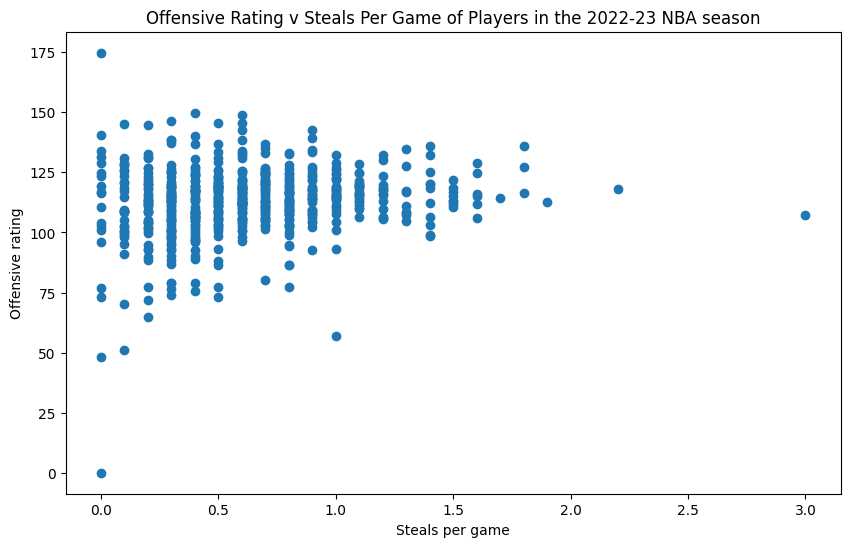

In [5]:
spg = data_23['SPG']
ORtg = data_23['ORtg']

plt.figure(figsize=(10, 6))  # Optional: set the figure size
plt.scatter(spg, ORtg)  # Use marker, linestyle, and color as desired

# Label the axes
plt.xlabel('Steals per game')
plt.ylabel('Offensive rating')

# Title the plot
plt.title('Offensive Rating v Steals Per Game of Players in the 2022-23 NBA season')

# Show the plot
plt.show()

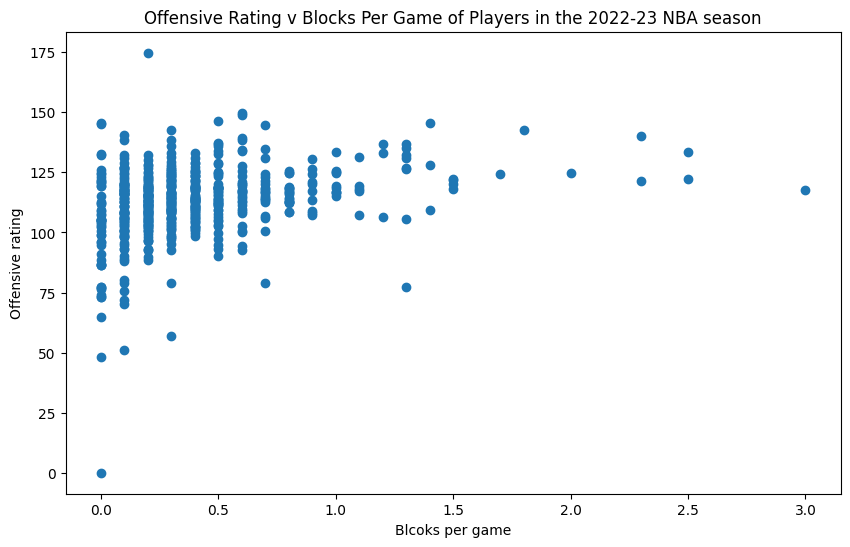

In [6]:
bpg = data_23['BPG']
plt.figure(figsize=(10, 6))  # Optional: set the figure size
plt.scatter(bpg, ORtg)  # Use marker, linestyle, and color as desired

# Label the axes
plt.xlabel('Blcoks per game')
plt.ylabel('Offensive rating')

# Title the plot
plt.title('Offensive Rating v Blocks Per Game of Players in the 2022-23 NBA season')

# Show the plot
plt.show()


<Figure size 640x480 with 0 Axes>

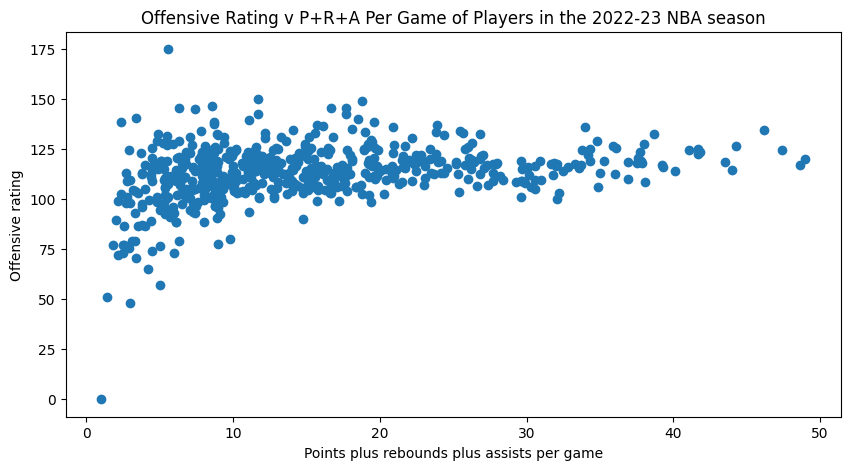

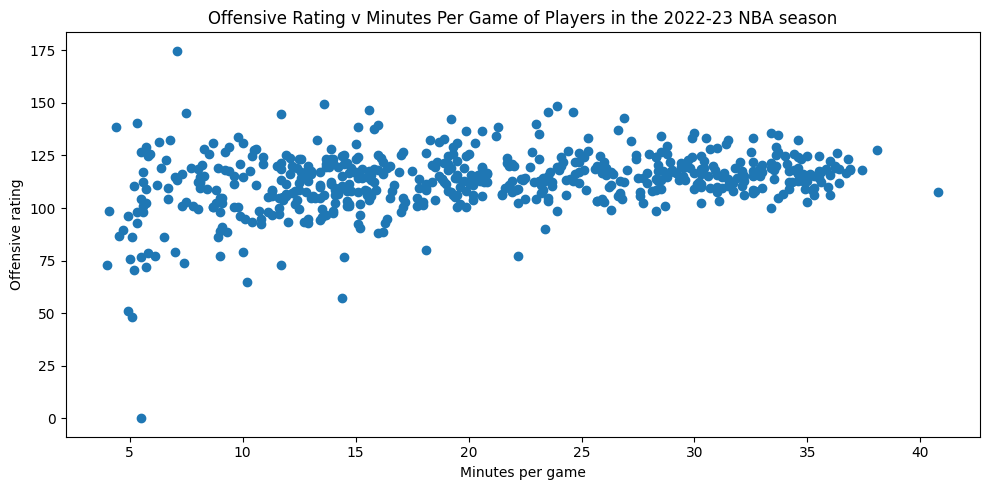

In [7]:
cpg = data_23['P+R+A']
mpg = data_23['MPG']
plt.figure(1)
plt.figure(figsize=(10, 5))  # Optional: set the figure size
plt.scatter(cpg, ORtg)  # Use marker, linestyle, and color as desired

# Label the axes
plt.xlabel('Points plus rebounds plus assists per game')
plt.ylabel('Offensive rating')

# Title the plot
plt.title('Offensive Rating v P+R+A Per Game of Players in the 2022-23 NBA season')

plt.figure(2)
plt.figure(figsize=(10, 5))  # Optional: set the figure size
plt.scatter(mpg, ORtg)  # Use marker, linestyle, and color as desired

# Label the axes
plt.xlabel('Minutes per game')
plt.ylabel('Offensive rating')
plt.title('Offensive Rating v Minutes Per Game of Players in the 2022-23 NBA season')

plt.tight_layout()
# Show the plot
plt.show()

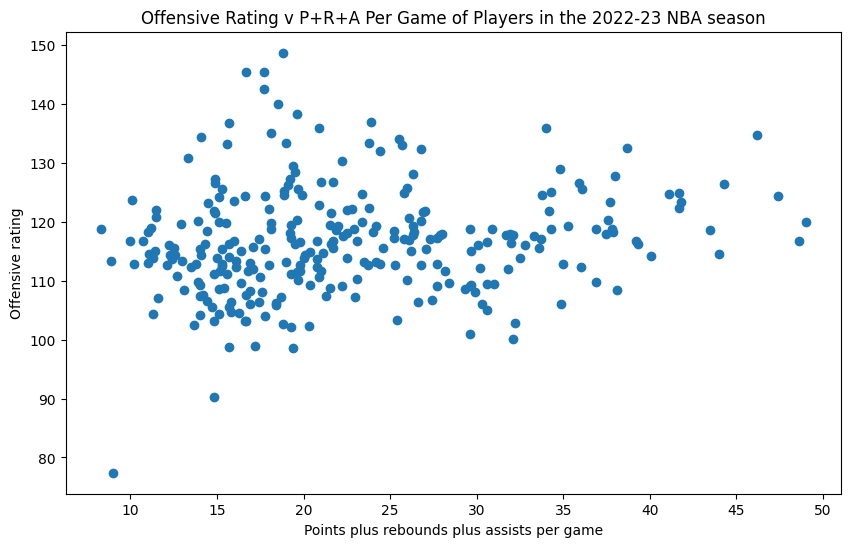

In [8]:
data_23.drop(data_23[data_23['MPG'] < 20].index, inplace=True)
data_24.drop(data_24[data_24['MPG'] < 20].index, inplace=True)
cpg = data_23['P+R+A']
ORtg = data_23['ORtg']
plt.figure(figsize=(10, 6))  # Optional: set the figure size
plt.scatter(cpg, ORtg)  # Use marker, linestyle, and color as desired

# Label the axes
plt.xlabel('Points plus rebounds plus assists per game')
plt.ylabel('Offensive rating')

# Title the plot
plt.title('Offensive Rating v P+R+A Per Game of Players in the 2022-23 NBA season')

# Show the plot
plt.show()


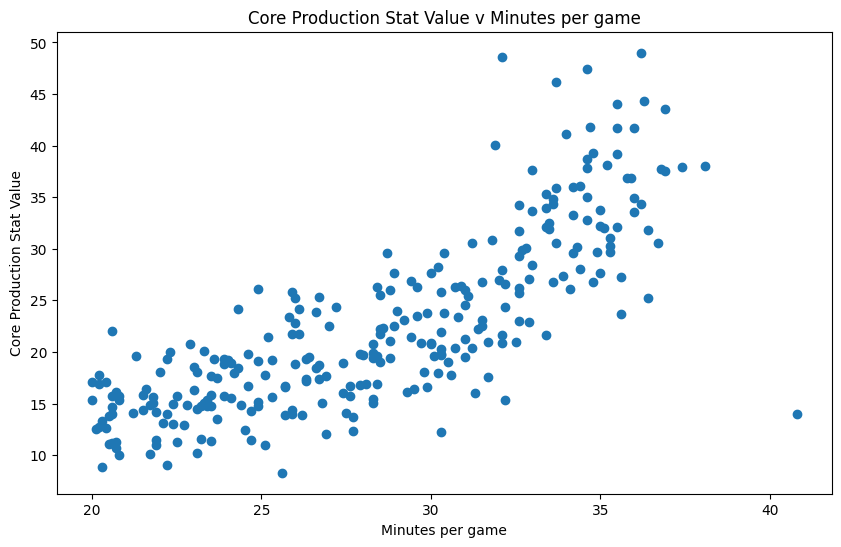

In [9]:
####Minutes v Production

mpg = data_23['MPG']
cpg = data_23['P+R+A']
plt.figure(figsize=(10, 6))  # Optional: set the figure size
plt.scatter(mpg, cpg)  # Use marker, linestyle, and color as desired

# Label the axes
plt.xlabel('Minutes per game')
plt.ylabel('Core Production Stat Value')

# Title the plot
plt.title('Core Production Stat Value v Minutes per game')

# Show the plot
plt.show()



In [10]:
count = (data_23['GP'] < 82).sum()
count

272

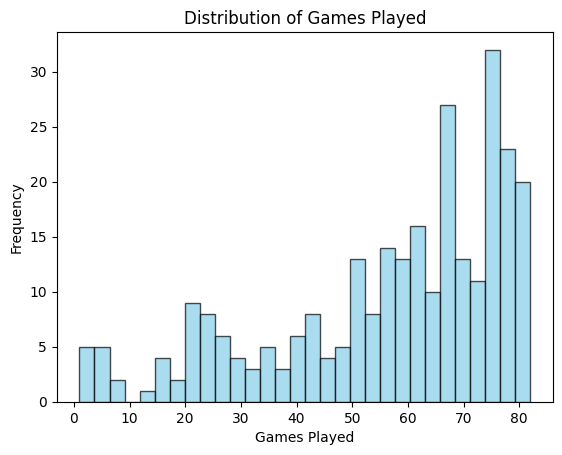

In [11]:
plt.hist(data_23['GP'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)

# Add labels and title
plt.xlabel('Games Played')
plt.ylabel('Frequency')
plt.title('Distribution of Games Played')

# Show the plot
plt.show()

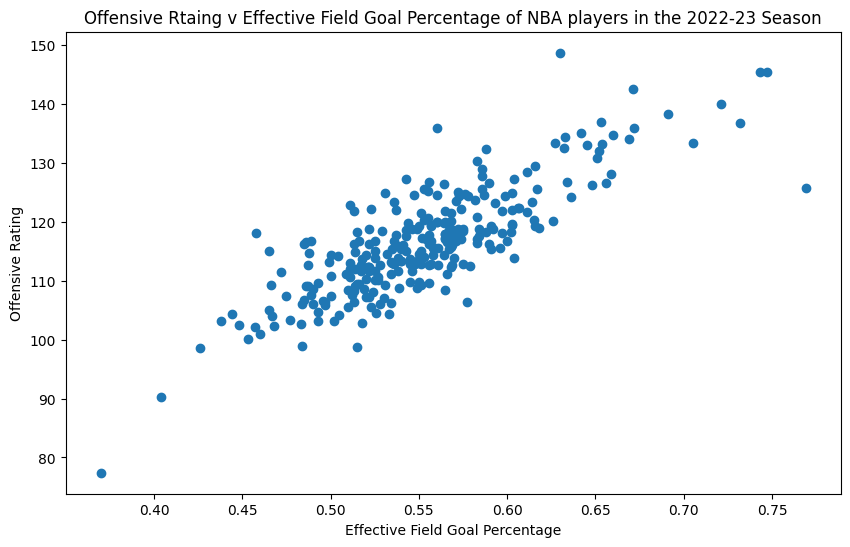

In [12]:
drtg = data_23['eFG%']
ortg = data_23['ORtg']
plt.figure(figsize=(10, 6))  # Optional: set the figure size
plt.scatter(drtg, ortg)  # Use marker, linestyle, and color as desired

# Label the axes
plt.xlabel('Effective Field Goal Percentage')
plt.ylabel('Offensive Rating')

# Title the plot
plt.title('Offensive Rtaing v Effective Field Goal Percentage of NBA players in the 2022-23 Season')

# Show the plot
plt.show()


In [13]:
data_23.shape

(280, 24)

In [14]:
#Ds - the source Ds of size n
#Dg - training target of size m
# regressor - base learning algorithim <- will use the Gradient Boosting Regressor
#N - max number of iterations
def calc_p( weights):
    total = np.sum(weights)
    result = np.asarray(weights / total, order='C')
    return result

def consolidate_array(arr):
    valid_values = [x for x in arr if x != -1]
    if valid_values:  # Check if valid_values is empty
        mean_value = np.mean(valid_values)  # Calculate mean if valid_values is not empty
        new_list = valid_values + [mean_value] * (len(arr) - len(valid_values))
    else:
        new_list = np.zeros_like(arr, dtype=float)
    return new_list



def TRADA_JQL(D_stx,D_gtx,D_sty,Dgty, Dstex, Dgtex, Dstey, Dgtey, N = 20):

  row_S = D_stx.shape[0]
  row_G = D_gtx.shape[0]

  ###Case if source data rows is greater than guide data rows
  if(row_G < row_S):
    difference = row_S - row_G
    df_dropped = D_stx.drop(D_stx.sample(n= int(difference + 0.1 * (row_S)) , random_state=42).index)
    df_dropped2 = D_sty.drop(D_sty.sample(n= int(difference + 0.1 * (row_S)) , random_state=42).index)
    df_dropped3 = Dstex.drop(Dstex.sample(n= int(difference + 0.1 * (row_S)) , random_state=42).index)
    df_dropped4 = Dstey.drop(Dstey.sample(n= int(difference + 0.1 * (row_S)) , random_state=42).index)
    D_stx = df_dropped.copy()
    D_sty = df_dropped2.copy()
    D_stex = df_dropped3.copy()
    D_stey = df_dropped4.copy()
    row_S = D_stx.shape[0]


  lamb = 0.5 ## tunable hyperparamter that is used in the JQL error calculation

  ###intializing weight vectors
  w_s = np.ones([row_S,1]) / (row_S)
  w_g = np.ones([row_G + 1,1]) / (row_G)
  weights = np.concatenate((w_s, w_g), axis=0)

  ###intializing the regressor USING GRADIENT BOOSTING REGRESSOR
  gbr_model = GradientBoostingRegressor(learning_rate=0.1,n_estimators=len(weights))

  D = pd.concat([D_stx, D_gtx], ignore_index=True)
  D_ytrain = pd.concat([D_sty, Dgty], ignore_index=True)
  D_xtest = pd.concat([Dstex, Dgtex], ignore_index=True)
  D_ytest = pd.concat([Dstey, Dgtey], ignore_index=True)

  JQL = [] ## array of JQL errors
  nre = []
  nqe = []
  best_iter = {}

  for i in range(N):
    pt = calc_p(weights)

    gbr_model.fit(D, D_ytrain, sample_weight=pt[:len(D)].flatten())

    y_pred = gbr_model.predict(D_xtest)

    ###calculating mean squared error
    mse = mean_squared_error(D_ytest, y_pred)
    print("Iteration:",i + 1 ," Mean Squared Error:", mse)

    #Calculating regression error with Definition 1
    regression_error = np.abs(D_ytest - y_pred)

    normalized_regression_error = (regression_error / max(regression_error))



    ####Calculating Quantile error with Defintion 2
    Q = 10 ### Number of quantiles
    sorted_true = np.argsort(D_ytest)
    sorted_pred = np.argsort(y_pred)

    y_true_quantile_ranks = np.argsort(sorted_true) + 1  # Quantile ranks for true values
    y_pred_quantile_ranks = np.argsort(sorted_pred) + 1 #quantile rannks for predicted values

    quantile_error = np.abs(y_pred_quantile_ranks - y_true_quantile_ranks) / Q
    normalized_quantile_error = quantile_error / max(quantile_error)



    ###JQL calculation error

    e_JQL = (lamb * normalized_regression_error) + ((1 - lamb) * normalized_quantile_error)

    if len(JQL) == 0:
      JQL.append(e_JQL)
    else:
      if(e_JQL.mean() > JQL[-1].mean()):
        if(normalized_regression_error.mean() > normalized_quantile_error.mean()):
          lamb -= (lamb * 0.1)
        else:
          lamb += (lamb * 0.1)
        e_JQL = (lamb * normalized_regression_error) + ((1 - lamb) * normalized_quantile_error)


    JQL.append(e_JQL)
    nqe.append(normalized_quantile_error.mean())
    nre.append(normalized_regression_error.mean())

    ### Calcualte estimator error
    et = 0 ## estimator error

    e_JQL = consolidate_array(e_JQL)

    # Number of values to pad (this can be set dynamically based on your condition)
    padding_size = (row_S + row_G) - len(e_JQL)  # for example, padding with 5 values

    if(padding_size > 0):
      min_val = np.min(e_JQL)
      max_val = np.max(e_JQL)
      padding_values = np.random.uniform(min_val, max_val)
      e_JQL = np.pad(e_JQL, (0, padding_size), 'constant', constant_values= padding_values)

    for i in range(row_S + 1,row_G):
      for j in range(row_S + 1, row_G):
        et += (w_g[i] * e_JQL[i])/(w_g[j])


    ###calculating beta
    beta_t = abs(et / (2 - et))
    beta = (1)/(1 + math.sqrt(2 * math.log(row_S/N)))

    ###updating weight vector
    for i in range(len(weights)):
      if(0 <= i < row_S):
        weights[i] = weights[i] * (beta ** (e_JQL[i]))
      elif(row_S <= i < min(len(weights),row_S + row_G)):
        weights[i] = weights[i] * (beta_t ** (-e_JQL[i]))


    ###calculating estimator weight
    estimator_weight = -math.log(beta_t[0])
    best_iter[mse] = [gbr_model, estimator_weight, D_ytest, y_pred]

  return best_iter[min(best_iter.keys())]




In [15]:
  y = data_23["ORtg"] ## label data
  X = data_23.drop(columns=["ORtg"]) ##feature data

  y1 = data_24["ORtg"] ## label data
  X1 = data_24.drop(columns=["ORtg"]) ##feature data

  X_train23,X_test23,y_train23,y_test23 = train_test_split(X, y, test_size=0.2, random_state=42)
  X_train24,X_test24,y_train24,y_test24 = train_test_split(X1, y1, test_size=0.2, random_state=42)



ht , weights , y_true, y_pred = TRADA_JQL(X_train23,X_train24,y_train23,y_train24,X_test23,X_test24,y_test23, y_test24, N = 20)
final_mse = mean_squared_error(y_true, y_pred)



print("Final Mean Squared Error:", final_mse)
print("Estimator Weight", weights)

r2 = r2_score(y_true, y_pred)
print(f"R-squared: {r2:.2f}")

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print(f"RMSE: {rmse:.2f}")


Iteration: 1  Mean Squared Error: 21.295834035381425
Iteration: 2  Mean Squared Error: 22.225183216479618
Iteration: 3  Mean Squared Error: 22.638343414711493
Iteration: 4  Mean Squared Error: 22.277949076132334
Iteration: 5  Mean Squared Error: 25.035575953766106
Iteration: 6  Mean Squared Error: 25.35113272479135
Iteration: 7  Mean Squared Error: 24.99657915986102
Iteration: 8  Mean Squared Error: 25.726857567968295
Iteration: 9  Mean Squared Error: 25.59223847510445
Iteration: 10  Mean Squared Error: 27.08070197507817
Iteration: 11  Mean Squared Error: 24.297395565691964
Iteration: 12  Mean Squared Error: 23.61351907854191
Iteration: 13  Mean Squared Error: 25.36834942605054
Iteration: 14  Mean Squared Error: 26.034736806092763
Iteration: 15  Mean Squared Error: 25.87453833271857
Iteration: 16  Mean Squared Error: 24.669979360179607
Iteration: 17  Mean Squared Error: 26.415613295479563
Iteration: 18  Mean Squared Error: 25.754698862378298
Iteration: 19  Mean Squared Error: 23.816606

In [16]:
# Assuming your target variable is y
print("Basic statistics of target variable:")
print(f"Min value: {y_true.min()}")
print(f"Max value: {y_true.max()}")
print(f"Mean: {y_true.mean():.2f}")
print(f"Standard deviation: {y_true.std():.2f}")
print(f"Range: {y_true.max() - y_true.min():.2f}")

# Get percentiles for better distribution understanding
percentiles = np.percentile(y_true, [25, 50, 75])
print(f"\nPercentiles:")
print(f"25th percentile: {percentiles[0]:.2f}")
print(f"50th percentile (median): {percentiles[1]:.2f}")
print(f"75th percentile: {percentiles[2]:.2f}")

Basic statistics of target variable:
Min value: 72.5
Max value: 145.5
Mean: 116.27
Standard deviation: 10.32
Range: 73.00

Percentiles:
25th percentile: 112.15
50th percentile (median): 116.25
75th percentile: 121.67
